In [1]:
%matplotlib inline
import starcoder42 as s
import PSG
import glob
import matplotlib.pyplot as plt

In [2]:
gcmfiles = glob.glob('*terminator.txt')
print (gcmfiles)

['trappist1e_1barN2_0.4barCO2_aqua_terminator.txt']


In [15]:
for i, fil in enumerate(gcmfiles):
    print("")
    print("File {}: {}".format(i, fil))
    x = PSG.PSG("TRAPPIST-1 e", fil, scope='MIRI-MRS', is_earth=False,
                atmosphere_ceiling=1e-6, n_uplayers=7, exposure_time=15,
                exposure_count=114)
    x.calculate(skprow=11)
    x.write()
    x.send(run=True)
    x.plot_setup()
    #x.depthPlot()
    #x.depthHeight()
    #x.emission()
    #x.raw()
    #x.star()
    #x.signalNoise()
    #x.signalNoiseRatio()
    #x.absorption()
    print("    Radiance Plots Complete")
    #x.trnTotal()
    #x.trnCO2()
    #x.trnN2()
    #x.trnH2O()
    #x.trnIce()
    #x.trnCloud()
    #x.trnCIA()
    #x.trnSpecies()
    #x.trnAero()
    #x.trnAll()
    #x.noiseBreakdown()
    #x.noisePPM()
print ("PSG: Operation complete")


File 0: trappist1e_1barN2_0.4barCO2_aqua_terminator.txt
Calculating Planet Data
    Using terminator profile
    Successfully added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is trappist1e_1barN2_0.4barCO2_psginput.txt
Sending to PSG
    curl -d type=all --data-urlencode file@trappist1e_1barN2_0.4barCO2_psginput.txt https://psg.gsfc.nasa.gov/api.php > trappist1e_1barN2_0.4barCO2_psgoutput_all.txt
    Successfully connected to NASA PSG
    7 files created
Ready to Make Plots
    Radiance Plots Complete
PSG: Operation complete


In [7]:
exposure_times = np.linspace(100,1000,10)
print(exposure_times)

[ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]


In [8]:
fil = gcmfiles[0]
exposure_results = []
for i, tim in enumerate(exposure_times):
    exp1 = PSG.PSG("TRAPPIST-1 e", fil, scope='MIRI-MRS',
                   atmosphere_ceiling=1e-6, n_uplayers=7,
                   exposure_time=16, exposure_count=tim)
    exp1.calculate(skprow=11)
    exp1.write()
    exp1.send(run=True)
    exp1.plot_setup()
    exposure_results.append(exp1)

Calculating Planet Data
Retrieving planet variables from NASA's Exoplanet Archive
    Using terminator profile
    Successfully added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is trappist1e_1barN2_0.4barCO2_psginput.txt
Sending to PSG
    curl -d type=all --data-urlencode file@trappist1e_1barN2_0.4barCO2_psginput.txt https://psg.gsfc.nasa.gov/api.php > trappist1e_1barN2_0.4barCO2_psgoutput_all.txt
    Successfully connected to NASA PSG
    7 files created
Ready to Make Plots
Calculating Planet Data
    Using terminator profile
    Successfully added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is trappist1e_1barN2_0.4barCO2_psginput.txt
Sending to PSG
    curl -d type=all --data-urlencode file@trappist1e_1barN2_0.4barCO2_psginput.txt https://psg.gsfc.nasa.gov/api.php > trappist1e_1barN2_0.4barCO2_psgoutput_all.txt
    Successfully 

In [10]:
print(exposure_results[0].Wavelengths)

[ 5.          5.00208333  5.00416753 ... 28.27544203 28.28722346
 28.29900981]


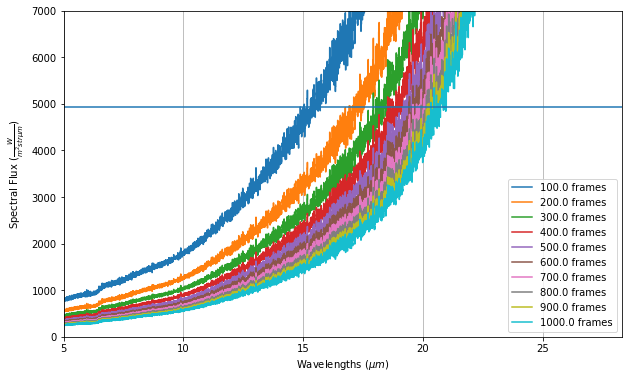

In [33]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
for i, psg in enumerate(exposure_results):
    ax.step(psg.Wavelengths, psg.nTotal/psg.Stellar * 1e6, where="post",
            label="{} frames".format(exposure_times[i]))
ax.set_xlabel("Wavelengths ($\mu m$)")
ax.set_ylabel(r"Spectral Flux ($\frac{W}{m^2 str \mu m}$)")
ax.set_xlim(*psg._plot_range)
ax.set_ylim(0,7000)
ax.axhline(4940)
ax.xaxis.grid(True)
ax.legend()

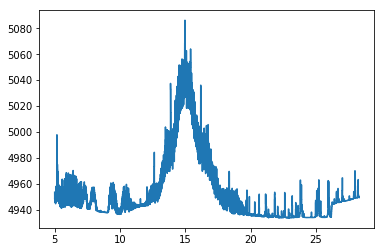

In [30]:
plt.step(psg.Wavelengths, (-psg.Transit)/psg.Stellar*1e6)